<a href="https://colab.research.google.com/github/gemma24/my_first_repo/blob/main/asx_stock_returns_steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will:

* Download prices
* Calculate Returns
* Calculate mean and standard deviation of returns

Lets load the modules first.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

Work around as Yahoo FInance made a change causing error with Pandas Datareader 


In [ ]:
!pip install yfinance
import yfinance as yfin
yfin.pdr_override()

     |████████████████████████████████| 6.3 MB 7.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=1e99b5044563e529656ea8b06af466aa43b4763b24865ace2a8a6d278fe50f37
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


## Step 1: Specify date range for analysis 

Here we begin by creating start and end dates using pythons datetime module. 

In [ ]:
start="2009-01-01"
end="2021-09-15"

## Step 2: Select the stocks/tickers you would like to analyse

For Australian stocks, yahoo tickers require '.AX' to be specified at the end of the ticker symbol.  For other tickers use the search bar in yahoo finance.

In [ ]:
tickers=['ANZ.AX', 'CBA.AX', 'NAB.AX']

In [ ]:
tickers

['ANZ.AX', 'CBA.AX', 'NAB.AX']

# Step 3: call the Pandas_Datareader DataReader module

In [ ]:
df=pdr.get_data_yahoo(tickers, start, end)

[*********************100%***********************]  3 of 3 completed


In [ ]:
help(pdr.get_data_yahoo)

Help on function download in module yfinance.multi:

download(tickers, start=None, end=None, actions=False, threads=True, group_by='column', auto_adjust=False, back_adjust=False, progress=True, period='max', show_errors=True, interval='1d', prepost=False, proxy=None, rounding=False, **kwargs)
    Download yahoo tickers
    :Parameters:
        tickers : str, list
            List of tickers to download
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime.
            Default is 1900-01-01
        end: str
            Download end date string (YYYY-MM-DD) or _datetime.
            Default is now
        group_by : str
            Group by 'ticker' or 'column' (de

In [ ]:
df.head()

Adj Close                       ...   Volume                      
              ANZ.AX     CBA.AX    NAB.AX  ...   ANZ.AX     CBA.AX     NAB.AX
Date                                       ...                               
2009-01-02  7.642381  14.494561  8.887321  ...  2413777  2269780.0  2572210.0
2009-01-05  7.587002  14.196732  8.813263  ...  2853413  2908531.0  2822855.0
2009-01-06  7.753141  14.628585  9.035444  ...  3128244  2564247.0  3803343.0
2009-01-07  7.727966  14.370469  9.100794  ...  4198861  3413898.0  4676568.0
2009-01-08  7.662520  14.176876  9.087723  ...  3169821  3969963.0  2949396.0

[5 rows x 18 columns]

## Step 4: Understanding the pandas dataframe structure

A good way to quickly understand how a pandas dataframe is structured is to look at the index and the columns.

In [ ]:
df.index

DatetimeIndex(['2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07',
               '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13',
               '2009-01-14', '2009-01-15',
               ...
               '2021-09-02', '2021-09-03', '2021-09-06', '2021-09-07',
               '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-13',
               '2021-09-14', '2021-09-15'],
              dtype='datetime64[ns]', name='Date', length=3214, freq=None)

In [ ]:
print(df.index)
print(df.columns)

DatetimeIndex(['2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07',
               '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13',
               '2009-01-14', '2009-01-15',
               ...
               '2021-09-02', '2021-09-03', '2021-09-06', '2021-09-07',
               '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-13',
               '2021-09-14', '2021-09-15'],
              dtype='datetime64[ns]', name='Date', length=3214, freq=None)
MultiIndex([('Adj Close', 'ANZ.AX'),
            ('Adj Close', 'CBA.AX'),
            ('Adj Close', 'NAB.AX'),
            (    'Close', 'ANZ.AX'),
            (    'Close', 'CBA.AX'),
            (    'Close', 'NAB.AX'),
            (     'High', 'ANZ.AX'),
            (     'High', 'CBA.AX'),
            (     'High', 'NAB.AX'),
            (      'Low', 'ANZ.AX'),
            (      'Low', 'CBA.AX'),
            (      'Low', 'NAB.AX'),
            (     'Open', 'ANZ.AX'),
            (     'Open', 'CBA.AX'),
            (    

## Step 5: Access useful attributes easily

We are interested in the closing price information for all of these stocks.

In [ ]:
Close=df['Close']
print(Close)

               ANZ.AX      CBA.AX     NAB.AX
Date                                        
2009-01-02  15.180000   29.042646  19.406162
2009-01-05  15.070000   28.445881  19.244446
2009-01-06  15.400000   29.311192  19.729599
2009-01-07  15.350000   28.793995  19.872292
2009-01-08  15.220000   28.406096  19.843754
...               ...         ...        ...
2021-09-09  27.510000  100.550003  28.400000
2021-09-10  27.590000  101.089996  28.450001
2021-09-13  27.620001  101.300003  28.180000
2021-09-14  27.709999  101.580002  28.230000
2021-09-15  27.480000  100.750000  28.000000

[3214 rows x 3 columns]


## Step 6: Gain insights quickly with pandas describe method


In [ ]:
df.describe()

Adj Close               ...        Volume              
            ANZ.AX       CBA.AX  ...        CBA.AX        NAB.AX
count  3214.000000  3212.000000  ...  3.212000e+03  3.212000e+03
mean     19.064239    52.234980  ...  3.685951e+06  6.725458e+06
std       5.464457    19.341565  ...  2.172032e+06  3.829146e+06
min       5.986029    11.948084  ...  0.000000e+00  0.000000e+00
25%      13.472273    30.705282  ...  2.357141e+06  4.421287e+06
50%      20.316768    56.786320  ...  3.144842e+06  5.857673e+06
75%      23.620510    65.034241  ...  4.335613e+06  7.903465e+06
max      29.530001   106.060188  ...  3.561263e+07  6.043383e+07

[8 rows x 18 columns]

In [ ]:
Close.describe()

,ANZ.AX,CBA.AX,NAB.AX
count,3214.000000,3212.000000,3212.000000
mean,25.874902,68.705208,26.603540
std,4.803331,15.493437,4.389994
min,11.890000,23.940290,13.880000
25%,22.832500,54.032254,23.591806
50%,26.375000,72.882553,26.608685
75%,28.965000,80.110001,29.850000
max,37.189999,108.169998,37.642250


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3214 entries, 2009-01-02 to 2021-09-15
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Adj Close, ANZ.AX)  3214 non-null   float64
 1   (Adj Close, CBA.AX)  3212 non-null   float64
 2   (Adj Close, NAB.AX)  3212 non-null   float64
 3   (Close, ANZ.AX)      3214 non-null   float64
 4   (Close, CBA.AX)      3212 non-null   float64
 5   (Close, NAB.AX)      3212 non-null   float64
 6   (High, ANZ.AX)       3214 non-null   float64
 7   (High, CBA.AX)       3212 non-null   float64
 8   (High, NAB.AX)       3212 non-null   float64
 9   (Low, ANZ.AX)        3214 non-null   float64
 10  (Low, CBA.AX)        3212 non-null   float64
 11  (Low, NAB.AX)        3212 non-null   float64
 12  (Open, ANZ.AX)       3214 non-null   float64
 13  (Open, CBA.AX)       3212 non-null   float64
 14  (Open, NAB.AX)       3212 non-null   float64
 15  (Volume, ANZ.AX)    

In [ ]:
Close.describe(percentiles=[0.1,0.2,0.3])

,ANZ.AX,CBA.AX,NAB.AX
count,3214.000000,3212.000000,3212.000000
mean,25.874902,68.705208,26.603540
std,4.803331,15.493437,4.389994
min,11.890000,23.940290,13.880000
10%,19.320000,49.015433,21.280190
20%,22.090000,51.918705,23.107321
30%,23.490000,57.829678,24.181601
50%,26.375000,72.882553,26.608685
max,37.189999,108.169998,37.642250


## Step 7: Plot and save

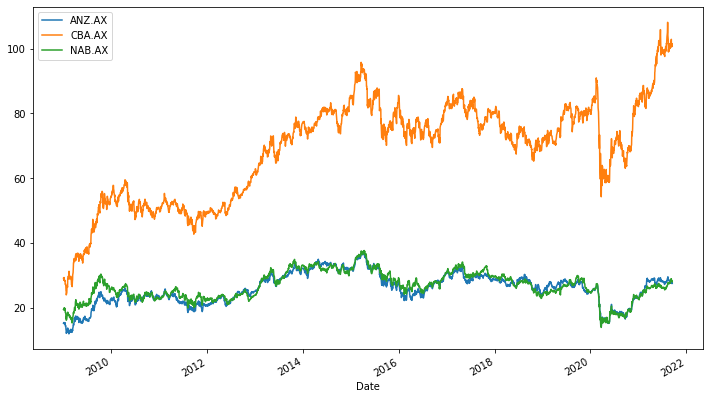

In [ ]:
Close.plot(figsize=(12,7))
plt.savefig("Aussiebanks.png")